In [ ]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio

from sklearn import linear_model, model_selection, metrics, preprocessing, decomposition
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/Project Dry Beans Dataset/'
results_path='/content/drive/My Drive/2022_SFC_IDSP/Project Dry Beans Dataset/'

Mounted at /content/drive/


In [ ]:
db_StdScl =  pd.read_csv(results_path+'db_phys_scale.csv')
db_StdScl.head()

,StdScl_Area,StdScl_Perimeter,StdScl_MajorAxisLength,StdScl_MinorAxisLength,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,SEKER


In [ ]:
db_StdScl.columns

Index(['StdScl_Area', 'StdScl_Perimeter', 'StdScl_MajorAxisLength',
       'StdScl_MinorAxisLength', 'Class'],
      dtype='object')

# db_StdScl Pairplot

<Figure size 1008x576 with 0 Axes>

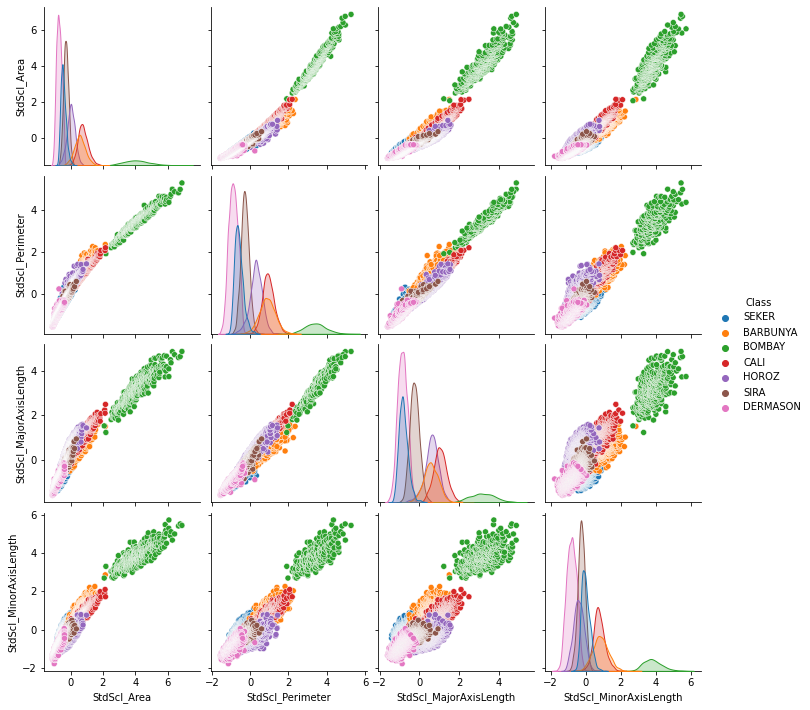

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(db_StdScl,hue='Class')

#Multifactor Regression 
y = StdScl_MinorAxisLength

x = StdScl_Area, StdScl_Perimeter, StdScl_MajorAxisLength

## MinorAxis as Area, Perimeter, MajorAxis

(9119, 3)
(9119,)
(4492, 3)


Text(0.5, -0.05, 'model coefficents (slope):[ 0.808   1.3516 -1.2505], model intercept: -0.0016, mean sq. error: 0.0266, R^2: 0.9711')

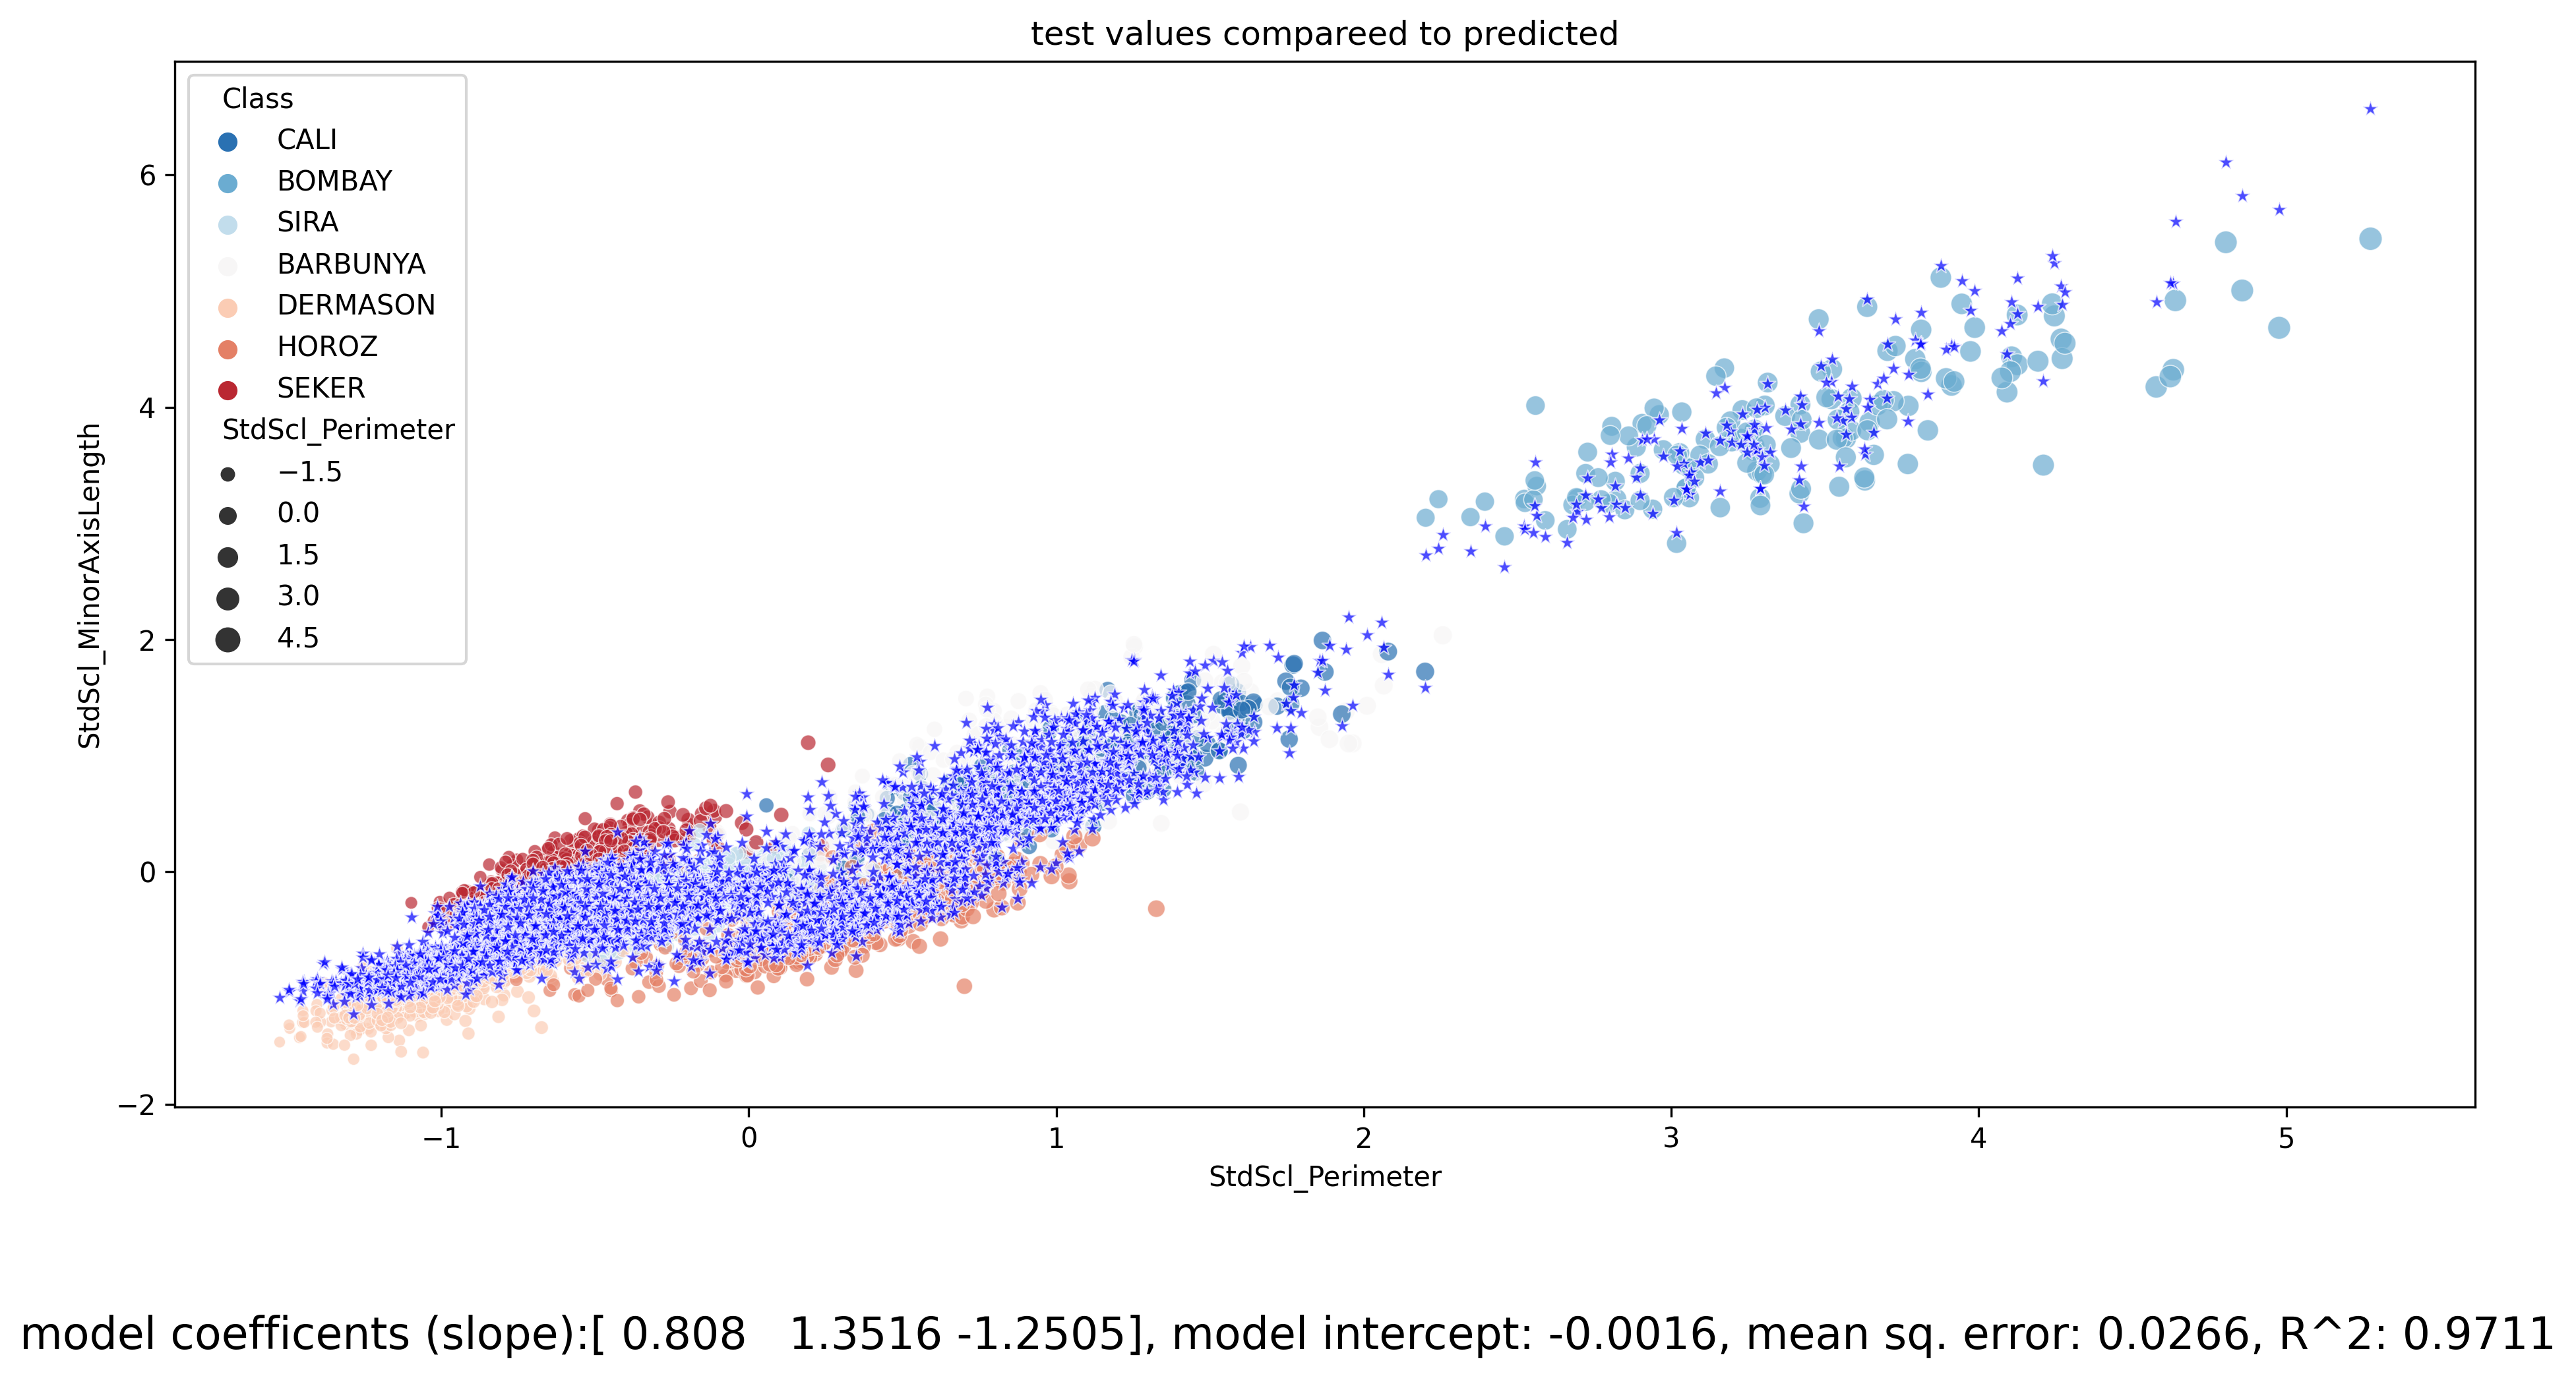

In [ ]:
train, test =  model_selection.train_test_split(db_StdScl, test_size=0.33,random_state=300, shuffle=True)

#form the arrays needed by sklean, we place two variables into model
X_train=train[['StdScl_Area','StdScl_Perimeter','StdScl_MajorAxisLength']].values
print(X_train.shape)
y_train= train[ 'StdScl_MinorAxisLength'].values
print(y_train.shape)
#extract the numerical values from the dataframe for all three parameters
X_test=test[['StdScl_Area','StdScl_Perimeter','StdScl_MajorAxisLength']].values
print(X_test.shape)

#build the model
lin_reg_mdl=linear_model.LinearRegression()
#fit the data
lin_reg_mdl.fit(X_train,y_train)
#predict on the test data
yfit = lin_reg_mdl.predict(X_test)

mdl_slope=np.round(lin_reg_mdl.coef_,4)
mdl_inter=np.round(lin_reg_mdl.intercept_,4)
db_StdScl_MSE = np.round(skl.metrics.mean_squared_error(test['StdScl_MinorAxisLength'].values, yfit),4)
db_StdScl_r2 = np.round(skl.metrics.r2_score(test['StdScl_MinorAxisLength'].values, yfit), 4)

plt.figure(figsize=(15,7), dpi=300)

#sns.scatterplot(data= train, x= 'nrm_inv_city',y= 'nrm_CO2',)

# plot the predicted values and the actual values for the test data on the sameplot
sns.scatterplot(data= test, x= 'StdScl_Perimeter',y= 'StdScl_MinorAxisLength',hue='Class',size='StdScl_Perimeter',palette='RdBu_r', alpha=0.7)
sns.scatterplot(data= test, x= 'StdScl_Perimeter',y= yfit,color='blue', alpha=0.7,marker="*")

plt.title('test values compareed to predicted')

caption='model coefficents (slope):{}, model intercept: {}, mean sq. error: {}, R^2: {}'.format(mdl_slope,mdl_inter,db_StdScl_MSE,db_StdScl_r2) 
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=16)

# Classification

## Univariate Logistic Regression

In [ ]:
dry_beans=  pd.read_excel(data_path+'Dry_Beans_Dataset.xlsx', sheet_name='Dry_Beans_Dataset')
dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
db = dry_beans[['Area','Perimeter','MajorAxisLength','MinorAxisLength','Class']].copy()

In [ ]:
db.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Class
0,28395,610.291,208.178117,173.888747,SEKER
1,28734,638.018,200.524796,182.734419,SEKER
2,29380,624.110,212.826130,175.931143,SEKER
3,30008,645.884,210.557999,182.516516,SEKER
4,30140,620.134,201.847882,190.279279,SEKER


In [ ]:
(db_StdScl['Class']).unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
len(db_StdScl['Class'])

13611

# db Pairplot

<Figure size 1008x576 with 0 Axes>

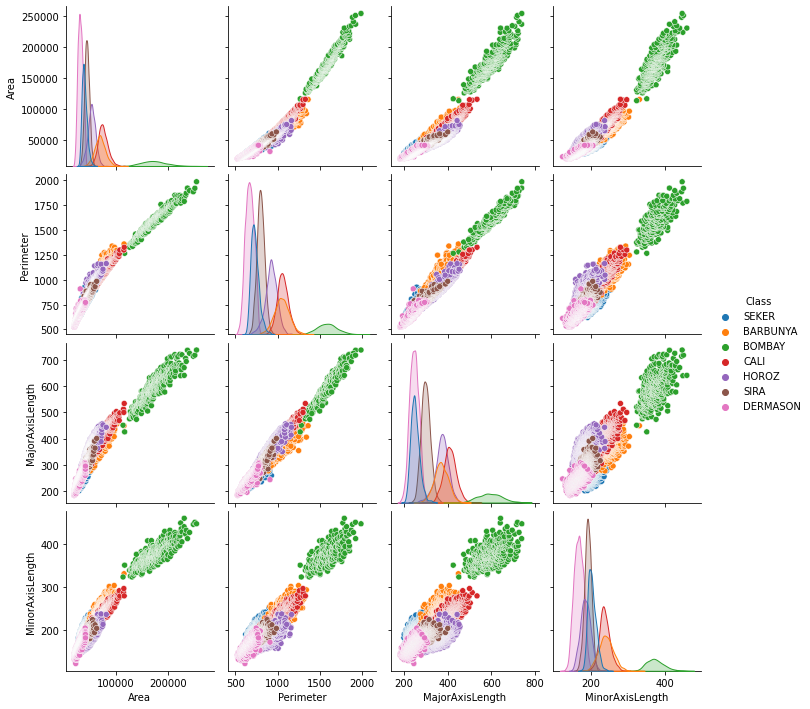

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(db,hue='Class')

### Data (**'BOMBAY'**)

In [ ]:
X= db['Perimeter'].values
#use logic to find all the places where the species is BOMBAY == 1, rest are ==0
y= (db['Class']=='BOMBAY').astype('int').values


In [ ]:
#X_s= db_StdScl['StdScl_Perimeter'].values
#use logic to find all the places where the species is BOMBAY == 1, rest are ==0
#y_s= (db_StdScl['Class']=='BOMBAY').astype('int').values

### Model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X.reshape(-1,1), y)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression
#log_reg_s = LogisticRegression(solver="liblinear", random_state=42)
#log_reg_s.fit(X_s.reshape(-1,1), y_s)

### Synthetic range of 'x' values ('StdScl_Perimeter')

In [ ]:
X_new = np.linspace(0.95*np.min(X), 1.25*np.max(X), 2000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [ ]:
#X_s_new = np.linspace(0.95*np.min(X), 1.25*np.max(X), 2000).reshape(-1, 1)
#y_s_proba = log_reg.predict_proba(X_s_new)

In [ ]:
X_new

array([[ 498.4992   ],
       [ 499.4913027],
       [ 500.4834054],
       ...,
       [2479.7282946],
       [2480.7203973],
       [2481.7125   ]])

In [ ]:
y_proba

array([[9.99980934e-01, 1.90659214e-05],
       [9.99980700e-01, 1.93002261e-05],
       [9.99980463e-01, 1.95374102e-05],
       ...,
       [1.33735570e-06, 9.99998663e-01],
       [1.32111992e-06, 9.99998679e-01],
       [1.30508124e-06, 9.99998695e-01]])

### Decision boundary

In [ ]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1381.4706042])

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


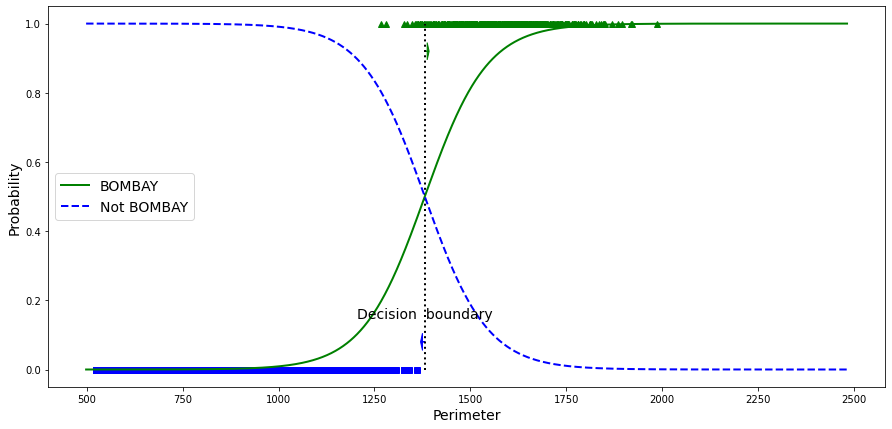

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary,decision_boundary],[0,1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="BOMBAY")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not BOMBAY")
plt.text(decision_boundary+0.3, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -6.3, 0, head_width=0.05, head_length=5, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 6, 0, head_width=0.05, head_length=5, fc='g', ec='g')
plt.xlabel('Perimeter', fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 3, -0.02, 1.02])

plt.show()

Everything above the decision boundary of 1381.20565979 is definitely 'BOMBAY'. 

Higher from 1381.20565979, higher the probability of being 'BOMBAY'

In [ ]:
db['Perimeter'].describe()

count    13611.000000
mean       855.283459
std        214.289696
min        524.736000
25%        703.523500
50%        794.941000
75%        977.213000
max       1985.370000
Name: Perimeter, dtype: float64

In [ ]:
1.25*(db['Perimeter']).max()

2481.7124999999996

In [ ]:
print(log_reg.predict([[1380], [1382]]))

print(log_reg.predict_proba([[1380], [1382]]))

[0 1]
[[0.50369208 0.49630792]
 [0.49753629 0.50246371]]


## Multivariate binary classification

In [ ]:
X_multi= db[['MinorAxisLength','Perimeter']].values

y= (db['Class']=='BOMBAY').astype('int').values

In [ ]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi, y)

LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

### Predict the behaviour on a set of synthetic points

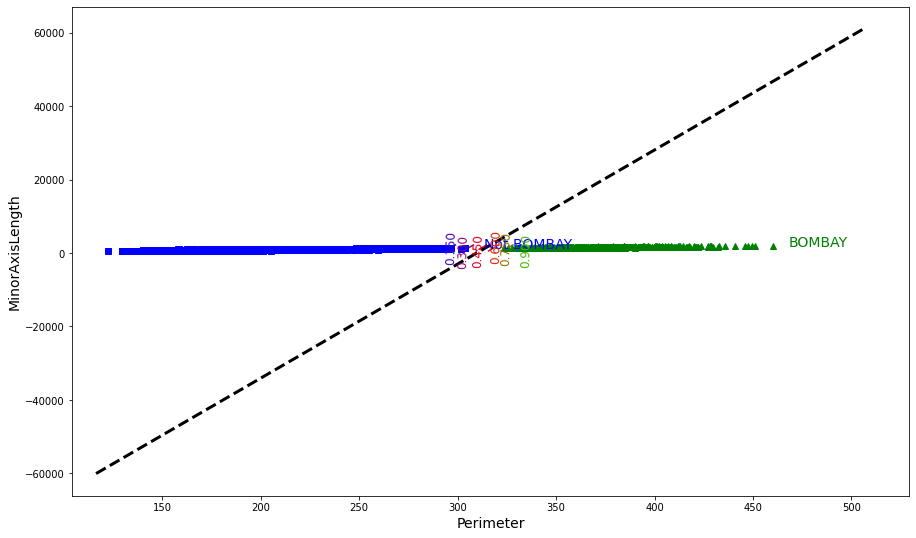

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0.85*np.min(X_multi[:,0]), 1.15*np.max(X_multi[:,0]), 500).reshape(-1, 1),
        np.linspace(0.85*np.min(X_multi[:,1]), 1.15*np.max(X_multi[:,1]), 200).reshape(-1, 1),
    )


X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(15, 9))
plt.plot(X_multi[y==0, 0], X_multi[y==0, 1], "bs")
plt.plot(X_multi[y==1, 0], X_multi[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#this number is wrong
left_right = np.array([0.95*np.min(X_multi[:,0]), 1.1*np.max(X_multi[:,0])])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.73*np.max(X_multi[:,0]), 0.65*np.max(X_multi[:,1]), "Not BOMBAY", fontsize=14, color="b", ha="center")
plt.text(1.05*np.max(X_multi[:,0]), 0.95*np.max(X_multi[:,1]), "BOMBAY", fontsize=14, color="g", ha="center")
plt.ylabel('MinorAxisLength', fontsize=14)
plt.xlabel('Perimeter', fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

### Model performance

In [ ]:
train, test =  model_selection.train_test_split(db, test_size=0.25,random_state=300, shuffle=True)


In [ ]:
X_multi_train= train[['MinorAxisLength','Perimeter']].values
y_train= (train['Class']=='BOMBAY').astype('int').values

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X_multi_train, y_train)


X_multi_test= test[['MinorAxisLength','Perimeter']].values

y_proba = log_reg.predict_proba(X_multi_test)
y_predict = log_reg.predict(X_multi_test)

y_test=(test['Class']=='BOMBAY').astype('int').values

overall_score= log_reg.score(X_multi_test, y_test)
print('overall accuracy = {}'.format(overall_score))

overall accuracy = 1.0


[[3283    0]
 [   0  120]]


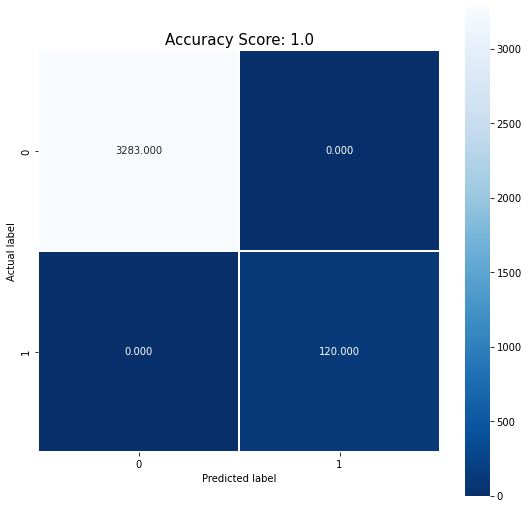

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(overall_score)
plt.title(all_sample_title, size = 15);


# PCA in low dimensions

In [ ]:
db_StdScl.head()

,StdScl_Area,StdScl_Perimeter,StdScl_MajorAxisLength,StdScl_MinorAxisLength,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,SEKER


## Covarience

In [ ]:
#create the correlation matrix
cm = db_StdScl[['StdScl_Perimeter','StdScl_MinorAxisLength']].corr()

#perform a linear fit
lin_reg_mdl=linear_model.LinearRegression()
X=db_StdScl['StdScl_Perimeter'].values.reshape(-1,1)
y=db_StdScl['StdScl_MinorAxisLength']
lin_reg_mdl.fit(X,y)
y_fit=lin_reg_mdl.predict(X)

mean_perimeter=db_StdScl['StdScl_Perimeter'].mean()
mean_minorAxis=db_StdScl['StdScl_MinorAxisLength'].mean()

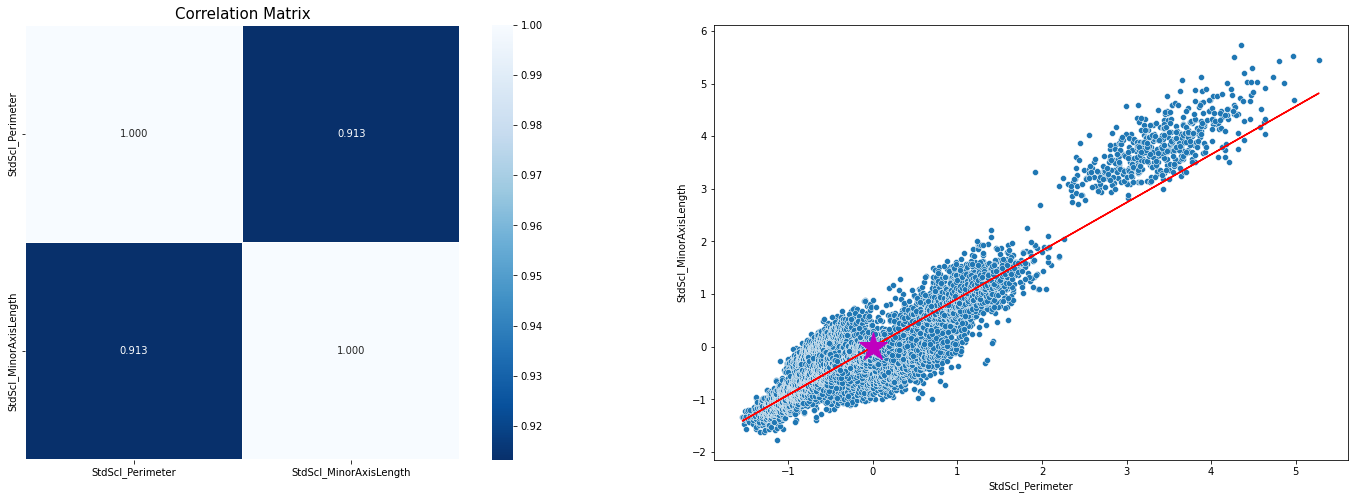

In [ ]:
fig= plt.figure(figsize=(25,8))

fig.add_subplot(1,2,2)

sns.scatterplot(data=db_StdScl, x='StdScl_Perimeter', y='StdScl_MinorAxisLength')
plt.plot(X,y_fit, color='red', )
plt.plot(mean_perimeter,mean_minorAxis, color='m',marker='*', markersize=30)

fig.add_subplot(1,2,1)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);
#plt.savefig('db_StdScl_ConfusionSeabornCodementor.png')
#plt.savefig(results_path + 'db_StdScl_perimeter_minorAx_fit.png')

Strong correlation of 0.913

How to compute the greater variance now?


## PCA on the first two vectors and transform

In [ ]:
pca = decomposition.PCA()
pca.fit(db_StdScl[['StdScl_Perimeter','StdScl_MinorAxisLength']])

pca_loadings=pca.transform(db_StdScl[['StdScl_Perimeter','StdScl_MinorAxisLength']])

print('The PCA compoents (vectors) are:', pca.components_)

print('The shape of the loading matrix is {}'.format(pca_loadings. shape))

print('The first PC explains {} and second PC explins {} of all the varience.'.format(100*pca.explained_variance_ratio_[0],100*pca.explained_variance_ratio_[1]))

The PCA compoents (vectors) are: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
The shape of the loading matrix is (13611, 2)
The first PC explains 95.65892776332264 and second PC explins 4.341072236677362 of all the varience.


## Principal Component vectors PLot

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v0, v1, arrowprops=arrowprops)

# plot data

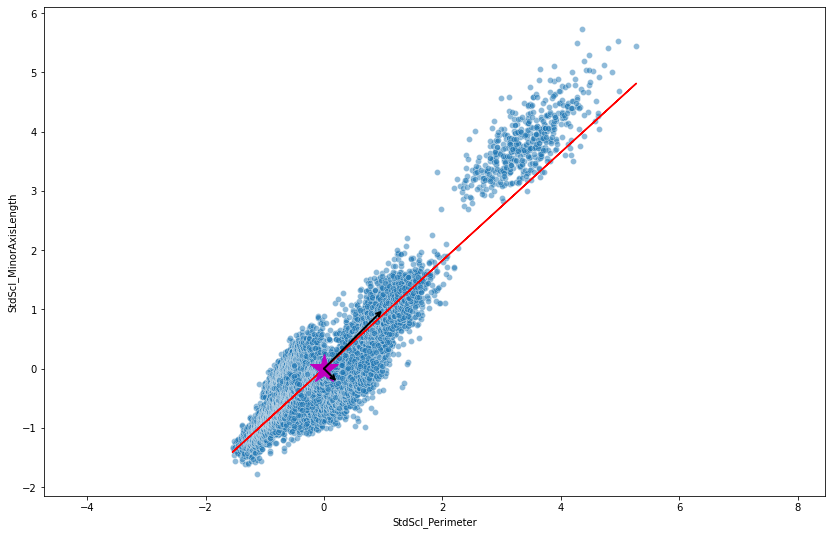

In [ ]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=db_StdScl, x= 'StdScl_Perimeter',y ='StdScl_MinorAxisLength', alpha =0.5)

plt.plot(X,y_fit, color='red', )
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

plt.show()

## New dataspace

### by perimeter

Text(0, 0.5, 'PCA 2')

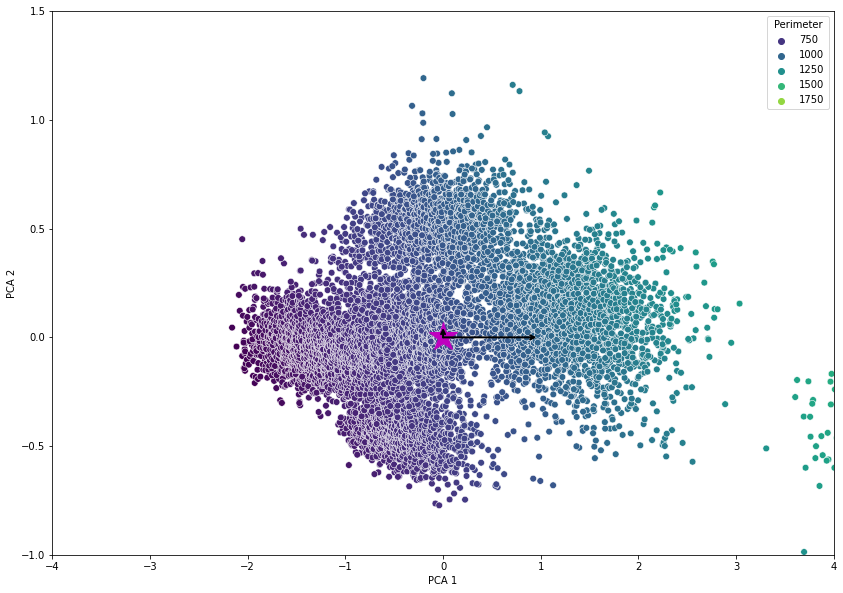

In [ ]:
fig=plt.figure(figsize=(14,10))

fig.add_subplot(1,1,1)
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1],hue=db['Perimeter'],palette='viridis', s=45)
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

draw_vector((0,0),(pca.explained_variance_ratio_[0],0))
draw_vector((0,0),(0,pca.explained_variance_ratio_[1]))

plt.xlim((-4,4))
plt.ylim((-1,1.5))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.xlabel('PCA 1 = {} * Mass + {} * Flipper'.format(np.round(pca.components_[0,0],2),np.round(pca.components_[0,1],2)))

### by Class

Text(0, 0.5, 'PCA 2')

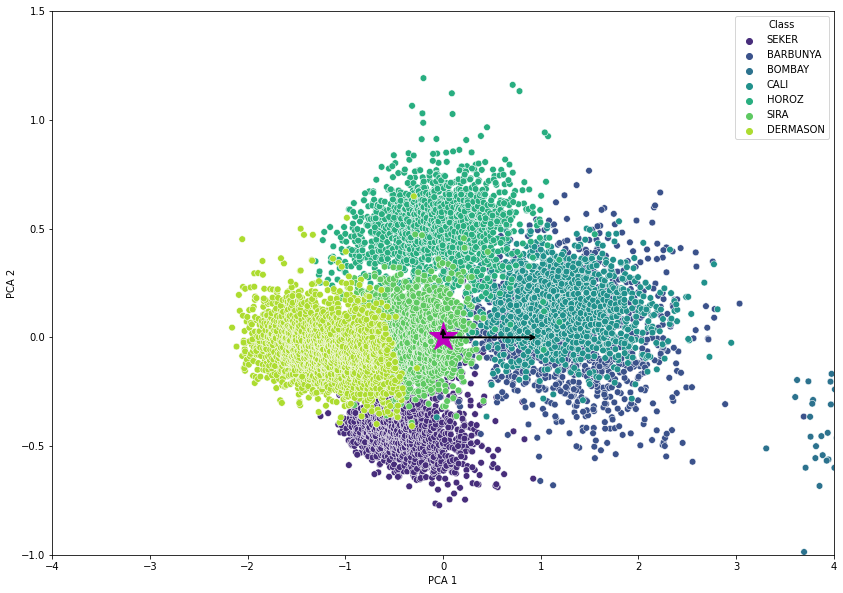

In [ ]:
fig=plt.figure(figsize=(14,10))

fig.add_subplot(1,1,1)
sns.scatterplot(x=pca_loadings[:,0], y=pca_loadings[:,1],hue=db['Class'],palette='viridis', s=45)
plt.plot(pca.mean_[0],pca.mean_[1], color='m',marker='*', markersize=30)

draw_vector((0,0),(pca.explained_variance_ratio_[0],0))
draw_vector((0,0),(0,pca.explained_variance_ratio_[1]))

plt.xlim((-4,4))
plt.ylim((-1,1.5))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
#db_StdScl.to_csv(results_path + 'db_StdScl.csv', sep=',', index=False)

## Full correlation matix

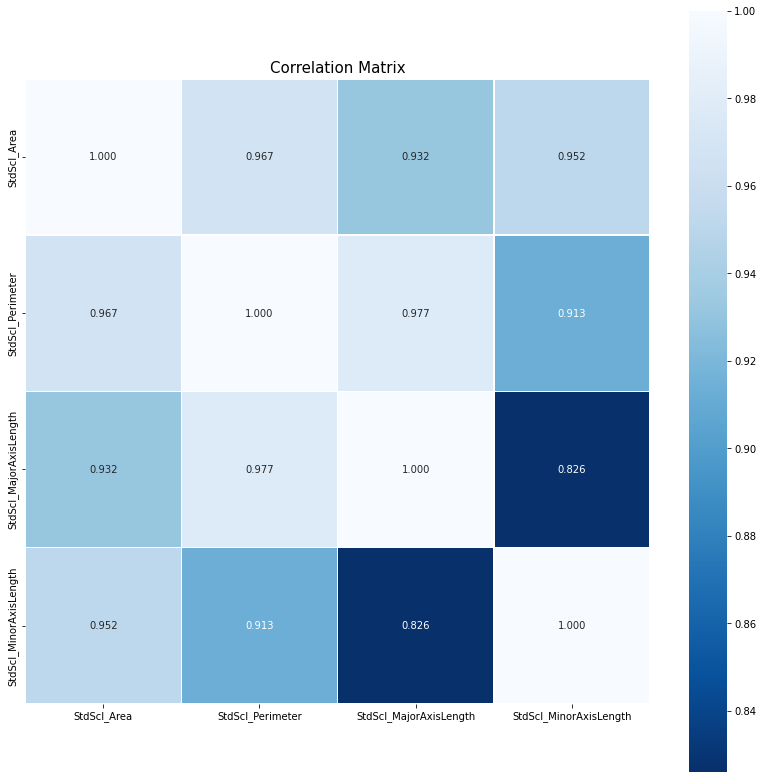

In [ ]:
cm = db_StdScl.corr()

plt.figure(figsize=(14,14))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.title('Correlation Matrix', size = 15);
#plt.savefig('Penguins_species_ConfusionSeabornCodementor.png')

# 4-D PCA analysis

In [ ]:
pca = decomposition.PCA()
pca_fit = pca.fit(db_StdScl.iloc[:,:-1])

pca_loadings=pca.transform(db_StdScl.iloc[:,:-1])

In [ ]:
db_StdScl_loadings=pd.DataFrame(pca_loadings, columns=['PCA1','PCA2','PCA3','PCA4'])

db_StdScl_loadings['Class']=db_StdScl['Class']

db_StdScl_loadings.to_csv(results_path + 'db_StdScl_PCA.csv',sep=',',index=False)

In [ ]:
pca_loadings.shape

(13611, 4)

## Scree plot

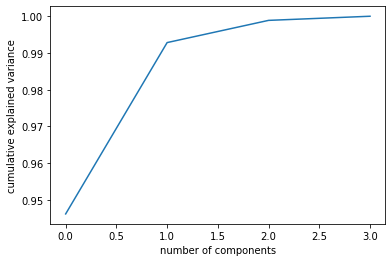

In [ ]:
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

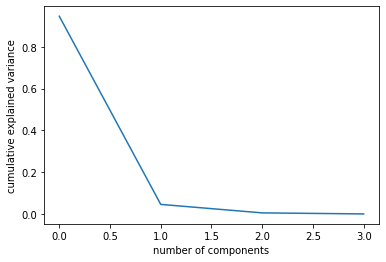

In [ ]:
plt.plot(pca_fit.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca_fit.explained_variance_ratio_)

array([0.94618641, 0.99282896, 0.99887549, 1.        ])

In [ ]:
pca_fit.components_

array([[ 0.50873234,  0.50972851,  0.49372169,  0.48744963],
       [ 0.14858356, -0.22181073, -0.6375709 ,  0.72265225],
       [ 0.81638363, -0.46994945, -0.02559074, -0.33467955],
       [ 0.22941687,  0.68565615, -0.59083615, -0.35798908]])

In [ ]:
pca_fit.explained_variance_

array([3.78502371, 0.18658391, 0.02418792, 0.00449836])

In [ ]:
pca_fit.explained_variance_ratio_

array([0.94618641, 0.04664255, 0.00604654, 0.00112451])

# PCA Pairplot

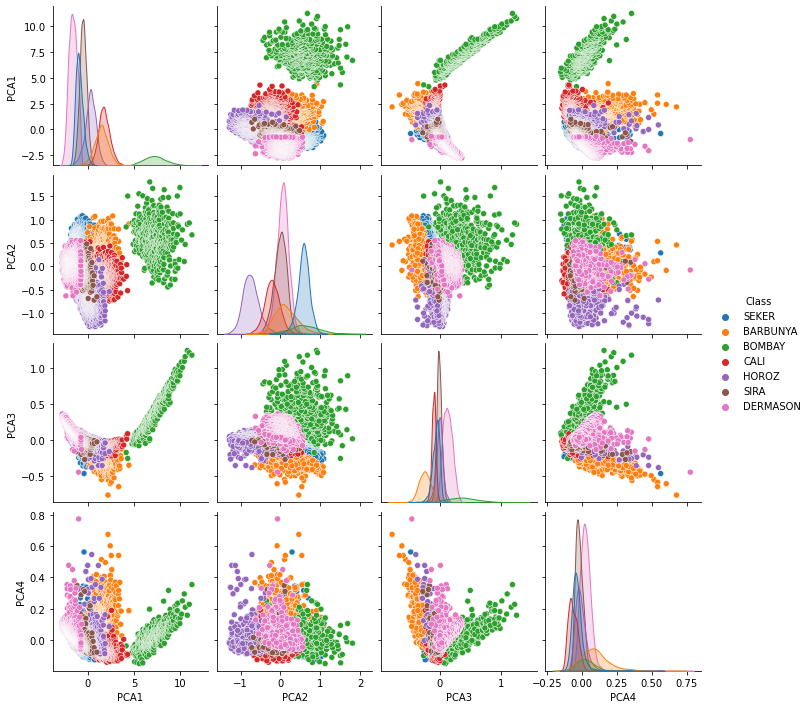

In [ ]:
sns.pairplot(data=db_StdScl_loadings, hue='Class')

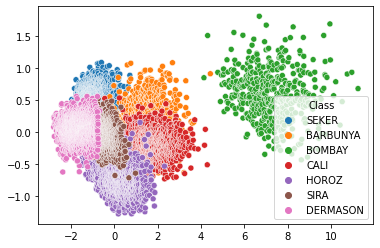

In [ ]:
sns.scatterplot(x=pca_loadings[:,0], y= pca_loadings[:,1], hue=db['Class'])

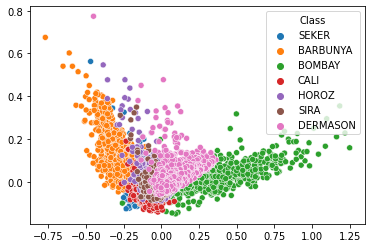

In [ ]:
sns.scatterplot(x=pca_loadings[:,2], y= pca_loadings[:,3], hue=db['Class'])